In [2]:
from stardust2.stardust import classify
from astropy.table import Table
from copy import deepcopy
import pickle
import sncosmo
import numpy as np

import snRequiem_stardust_classify as classifier

In [8]:
from matplotlib import pyplot as plt

In [11]:
sndat = classifier.get_lens_model_corrected_photometry(classifier.snphotdata)

In [6]:
rerun = False
if rerun:
    results = classifier.run_stardust(verbose=False)
else:
    results = pickle.load(open('snReqieum_stardust_classify_results.pkl','rb'))


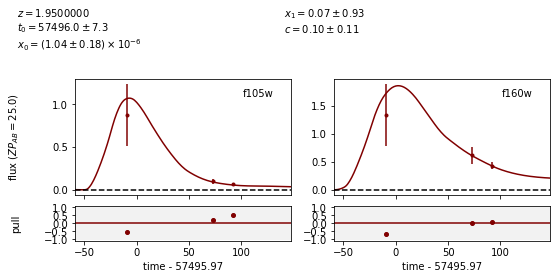

In [9]:
classify.plot_maxlike_fit(results['salt2-extended'], templateset='snana')
plt.savefig("/Users/rodney/Desktop/snRequiem_stardust_classify_Ia.png", overwrite=True)


In [12]:
sndat

time,band,flux,fluxerr,zp,zpsys,snid,img,mu,muerr,dt
float64,str5,float64,float64,float64,str2,int64,float64,float64,float64,float64
57588.03,f105w,0.02244689019708216,0.005219951440557988,23.9,ab,1,1.1,3.907,0.534,0.0
57486.63,f105w,0.31799214198618075,0.1311611308684628,23.9,ab,2,1.2,7.381,3.044,101.4
57568.729999999996,f105w,0.03482071713147411,0.009002318577156264,23.9,ab,3,1.3,5.02,1.217,19.3
57587.97,f160w,0.15646275915024313,0.024086156875818148,23.9,ab,1,1.1,3.907,0.534,0.0
57486.57,f160w,0.4838775233708169,0.1996504025266793,23.9,ab,2,1.2,7.381,3.044,101.4
57568.67,f160w,0.22440239043824703,0.055109841223682766,23.9,ab,3,1.3,5.02,1.217,19.3


In [26]:
from matplotlib import rcParams


In [36]:
rcParams['legend.shadow']=False
rcParams['legend.fontsize']=30
rcParams['text.usetex']=True

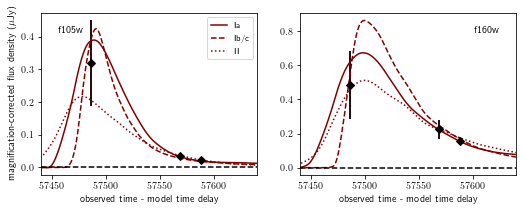

In [42]:
classify.plot_fits(results, nshow=3, templateset='snana', zp=23.9, dpi=300)
fig = plt.gcf()
ax0, ax1 = fig.axes
ax0.set_xlim(57440, 57640)
ax1.set_xlim(57440, 57640)

for ax, band in zip(fig.axes, ['f105w','f160w']):
    iband = np.where(sndat['band']==band)[0]
    ax.errorbar(sndat['time'][iband], sndat['flux'][iband], sndat['fluxerr'][iband],
                marker='D', color='k', ls=' ', ms=5)

ax0.set_ylabel(r'magnification-corrected flux density ($\mu$Jy)', usetex=True)
ax0.set_xlabel(r'observed time - model time delay', usetex=True)
ax1.set_xlabel(r'observed time - model time delay', usetex=True)


plt.savefig("/Users/rodney/Desktop/snRequiem_stardust_classify_alltypes.pdf", 
            dpi=300, overwrite=True)

In [46]:
results['pIa'], results['pIbc'], results['pII']

(0.9366156328171145, 0.0067655044565694345, 0.05661886272631575)

# STOP

In [ ]:
results = pickle.load(
    open('snReqieum_stardust_classify_results.pkl','rb'))

In [ ]:
results['salt2-extended']['sn']['fluxerr'] / photdatnew['fluxerr']

In [ ]:
classify.plot_maxlike_fit(results['salt2-extended'])

In [ ]:
classify.plot_fits(results, nshow=1)

In [44]:
results.keys()

dict_keys(['salt2-extended', 'bestmodel', 'snana-2004fe', 'snana-2004gq', 'snana-sdss004012', 'snana-2006fo', 'snana-sdss014475', 'snana-2006lc', 'snana-04d1la', 'snana-04d4jv', 'snana-2004gv', 'snana-2006ep', 'snana-2007y', 'snana-2004ib', 'snana-2005hm', 'snana-2006jo', 'snana-2007nc', 'snana-2007ms', 'snana-2004hx', 'snana-2005gi', 'snana-2006gq', 'snana-2006kn', 'snana-2006jl', 'snana-2006iw', 'snana-2006kv', 'snana-2006ns', 'snana-2007iz', 'snana-2007nr', 'snana-2007kw', 'snana-2007ky', 'snana-2007lj', 'snana-2007lb', 'snana-2007ll', 'snana-2007nw', 'snana-2007ld', 'snana-2007md', 'snana-2007lz', 'snana-2007lx', 'snana-2007og', 'snana-2007nv', 'snana-2007pg', 'snana-2006ez', 'snana-2006ix', 'pIa', 'pIbc', 'pII', 'logztype', 'logzall'])

In [45]:
classifier.priors_from_host_data

{'Ia': 0.624, 'II': 0.26849999999999996, 'Ibc': 0.0895}

In [ ]:
results['salt2-extended']['res'].keys()

In [ ]:
classify.plot_fits(results)

In [ ]:
photdatatable = """#
# Final photometry and best available lens model (previously model H, now model E)
# flux is psf-fitting photometry, with associated uncertainty fluxerr
# 
# The magnification estimates `mu` have not been applied to the photometry
# the time delay estimates 'dt' have not been applied to the dates
#
# time   band    flux  fluxerr zp zpsys snid img   mu   muerr    dt
57588.03 f105w 0.0877  0.0165 23.9 ab     1  1.1  3.907 0.534   0.0
57588.03 f105w 2.3471  0.0160 23.9 ab     2  1.2  7.381 3.044 101.4
57588.03 f105w 0.1748  0.0157 23.9 ab     3  1.3  5.020 1.217  19.3
57587.97 f160w 0.6113  0.0433 23.9 ab     1  1.1  3.907 0.534   0.0
57587.97 f160w 3.5715  0.0453 23.9 ab     2  1.2  7.381 3.044 101.4
57587.97 f160w 1.1265  0.0442 23.9 ab     3  1.3  5.020 1.217  19.3
"""


In [ ]:
snphotdata = Table.read(photdatatable, format='ascii.commented_header', header_start=-1)

In [ ]:
def apply_lens_model_corrections(photdat):
    """ make a modified version of the photometry table, 
    correcting for the lens model mu and dt"""

    photdatnew = deepcopy(photdat)

    mu = photdat['mu'].data
    muerr = photdat['muerr'].data
    dt = photdat['dt'].data   
    f = photdat['flux'].data
    ferr = photdat['fluxerr'].data

    photdatnew['flux'] = f / mu
    photdatnew['fluxerr'] = (f/mu) * np.sqrt((ferr/f)**2 + (muerr/mu)**2)
    photdatnew['time'] = photdat['time'] - dt
    
    return(photdatnew)

In [ ]:
photdatnew = apply_lens_model_corrections(snphotdata)

In [ ]:
sncosmo.plot_lc(photdatnew)

In [ ]:
sncosmo.plot_lc(data=photdatnew)

In [ ]:
classification_results = classify.classify(
    photdatnew, zhost=1.95, zhosterr=0.001, t0_range=[57480.,57500.],
    zminmax=[1.94,1.96], npoints=100, maxiter=1000, templateset='PSNID',
    nsteps_pdf=101, verbose=True)

In [ ]:
photdatnew.remove_columns()

In [ ]:
classification_results = classify.classify(
    sndata, templateset=templateset, zhost=z, zhosterr=z_err, zminmax=zminmax, 
    t0_range=t0_range, logpriordictvals=logpriordictvals)


### Below is Kyle's work

In [ ]:
#from sncosmo_color_figs import colorcolorfig
import colorcolorfig
#from starDust2.starDust2 import classify
#from starDust2 import starDust2
import pickle
import glob,os
import numpy as np
from astropy.io import fits, ascii
import astropy
from astropy.table import Table,vstack
import sncosmo
#import sfdmap
#import pierel_util
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
%matplotlib inline

In [ ]:
"""
from Gabe
Forget MODEL A/B (not well constrained)
MODELD allows the main cluster dark matter halo to wander around the reference position taken at the BCG center
MODELE allows the same central position offset and relax constraints on the BCG (velocity dispersion, cut radius)
MODELF fixes the DM halo on the BCG but relax the constraints on the BCG.
Naming the images SN.1 SN.2 SN.3 from north to South (or West to East)
"""
z = 1.95
print('SN rest frame...')
print(160/(1+z),105/(1+z))
print('V ~ 550 is close to f160, U~ 365 is nearest to f105')
print('f105 - f160 ~ U-V')

phot = ascii.read(open('mrg0138_phot.txt','rb'))
# if need normalized
phot_normalized = sncosmo.data_standardize_and_normalize(phot,zp=25,zpsys='ab')  # phot_normalized.flux, .fluxerr, .time, .band

lensing_modelC = ascii.read(open('lensing_modelC.txt','rb'))
lensing_modelD = ascii.read(open('lensing_modelD.txt','rb'))
lensing_modelE = ascii.read(open('lensing_modelE.txt','rb'))
lensing_modelF = ascii.read(open('lensing_modelF.txt','rb'))
lensing_modelH = ascii.read(open('lensing_modelH.txt','rb'))

print('phot:',phot)

# 3 images of SN broken into they own tables, make a little easier to feed into functions
SN1 = phot[phot['id']==0]
SN2 = phot[phot['id']==1]
SN3 = phot[phot['id']==2]
SN1_lensC,SN1_lensD,SN1_lensE,SN1_lensF,SN1_lensH = lensing_modelC[lensing_modelC['MODELC']=='SN.1'], lensing_modelD[lensing_modelC['MODELC']=='SN.1'], lensing_modelE[lensing_modelC['MODELC']=='SN.1'], lensing_modelF[lensing_modelC['MODELC']=='SN.1'],lensing_modelH[lensing_modelH['MODELH']=='SN.1']
SN2_lensC,SN2_lensD,SN2_lensE,SN2_lensF,SN2_lensH = lensing_modelC[lensing_modelC['MODELC']=='SN.2'], lensing_modelD[lensing_modelC['MODELC']=='SN.2'], lensing_modelE[lensing_modelC['MODELC']=='SN.2'], lensing_modelF[lensing_modelC['MODELC']=='SN.2'],lensing_modelH[lensing_modelH['MODELH']=='SN.2']
SN3_lensC,SN3_lensD,SN3_lensE,SN3_lensF,SN3_lensH = lensing_modelC[lensing_modelC['MODELC']=='SN.3'], lensing_modelD[lensing_modelC['MODELC']=='SN.3'], lensing_modelE[lensing_modelC['MODELC']=='SN.3'], lensing_modelF[lensing_modelC['MODELC']=='SN.3'],lensing_modelH[lensing_modelH['MODELH']=='SN.3']

def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[0]) 
    return sub_li

def binned(t,mag,n=100):
    # give list of times and corresponding mags from simulations
    # [tbin,mags], tbin ~ (tmin,tmax,tvals), mag_vals ~ (mag_mean,mag_sigma,mag_vals) 
    # for i in binned: plt.fillbetween(tbin,magmean,upper,lower)
    
    zipped = list(zip(t,mag))
    sort_zipped = Sort(zipped)
    # list comprehension breaks list into lists of size n  
    final = [zipped[i * n:(i + 1) * n] for i in range((len(zipped) + n - 1) // n )]  
    
    binned_vals = []
    for i in final:
        t = [j[0] for j in i]
        mag = [j[1] for j in i]
        t_med,t_sigma = np.median(t),np.std(t)
        mag_med,mag_sigma = np.median(mag),np.std(mag)
        binned_vals.append([(t_med,t_sigma,t),(mag_med,mag_sigma,mag)])
    
    return binned_vals

def lens_extinction(source='salt2-extended',zs=1.95,zl=0.338,Av=1,dust=sncosmo.CCM89Dust(),t=0):
    # the source makes no difference, dust has same effect on every model
    # the model as it would look like for obs at the lens plane w no dust
    model=sncosmo.Model(source=source)
    model.set(z=zs-zl) 
    # the model as it would look for obs at lens w dust
    dust_model = sncosmo.Model(source=source,effects=[dust],effect_names=['mw'],effect_frames=['obs'])
    dust_model.set(z=zs-zl)
    r_v = 3.1 # AV/E(B-V) typical value for diffuse ISM
    ebv = Av/r_v
    dust_model.set(mwebv=ebv,mwr_v=r_v)
    """
    I want to know how the dust dimmed f160w & f105w in our frame ie zl~0.338 further
    f160w ~ 16000 & f105w ~ 10500 (Angstrom), they have widths about 1500 (Angstrom)
    lens observer at these wavelengths/(1+zl) should correspond to the wavelengths for us
    I can get flux density at each of these filters eff wavelength w & wo dust
    the filters aren't terribly wide and throughputs are flat, will approximate mags using just eff wavelength
    that should get me an approximate vec shift (E(105-160),A160) I want w Av ~ 1 in the lens plane
    """
    # the intrinsic flux densities for lens observer at the corresponding wavelengths to bands we see  
    f160 = model.flux(t,[16000/(1+zl)])
    f105 = model.flux(t,[10500/(1+zl)])
    # dusty flux densities
    dustyf160 = dust_model.flux(t,[16000/(1+zl)])
    dustyf105 = dust_model.flux(t,[10500/(1+zl)])
    
    # what do the extinctions look like, A ~ mobs - m
    A160 = -2.5*np.log10(dustyf160/f160)
    A105 = -2.5*np.log10(dustyf105/f105)
    # my color mag is (x,y) ~ (f105w-f160w,f160w)
    # I want to show vector (E(105-160),A160)
    # color excess 
    E = A105 - A160
    return (E[0],A160[0])

def extinction_vector(source='salt2-extended',z=1.95,Av=1,dust = sncosmo.CCM89Dust(),t=0):
    # the no host dust model
    model = sncosmo.Model(source=source)
    model.set(z=z)
    # the dust model 
    dust_model = sncosmo.Model(source=source,effects=[dust],effect_names=['host'],effect_frames=['rest'])
    dust_model.set(z=z)
    r_v = 3.1 # AV/E(B-V) typical value for diffuse ISM
    ebv = Av/r_v
    dust_model.set(hostebv=ebv,hostr_v=r_v)
    
    # t ~ 0 defaults to peak, not important when we determine the extinction,color excess
    # stay the same throughought the lightcurve evolution, just property of dust distributions
    
    # the intrinsic mags
    m160 = model.bandmag('f160w','ab',t)
    m105 = model.bandmag('f105w','ab',t)
    # the observed mags after extinction
    dusty160 = dust_model.bandmag('f160w','ab',t)
    dusty105 = dust_model.bandmag('f105w','ab',t)
    
    # my color mag is (x,y) ~ (f105w-f160w,f160w)
    # I want to show vector (E(105-160),A160)
    # the extinctions
    A160 = dusty160 - m160 # should be ~ 1 mag 
    A105 = dusty105 - m105
    # color excess 
    E = A105 - A160
    return (E,A160)    

def color(data):
    # m105 - m160
    # more neg is bluer, more pos is redder
    # data ~ the ith SN table
    f105 = data[data['band']=='f105w']['flux']
    f160 = data[data['band']=='f160w']['flux']
    return -2.5*np.log10(f105/f160)[0]

def m(data,band='f105w',demagnify=True,lensmodel=None):
    # data use the ith SN table
    # m105 by default, change band to 'f160w' if rather see that
    # uses actual ab zp given, ie not rescaled so abzp ~ 25 
    band_data = data[data['band']==band]
    mag = -2.5*np.log10(band_data['flux']) + band_data['zp']
    if demagnify:
        if lensmodel == None: # use magnification from phot table
            mag += 2.5*np.log10(band_data['mu'])
        else: # use particular lensmodel provided
            mag += 2.5*np.log10(lensmodel['MU'])
    return mag[0]

def f(data,band='f105w',demagnify=True,lensmodel=None,lenserror=False,photmethod='ap'):
    # data use the ith SN table
    # m105 by default, change band to 'f160w' if rather see that
    # uses actual ab zp given, ie not rescaled so abzp ~ 25 
    band_data = data[data['band']==band]
    mag = -2.5*np.log10(band_data['flux']) + band_data['zp']
    if photmethod=='ap':
        flux=band_data['flux']
    elif photmethod=='psf':
        flux=band_data['psf_flux']
    if demagnify:
        if lensmodel == None: # use magnification from phot table
            mag += 2.5*np.log10(band_data['mu'])
            flux *= 1/band_data['mu']
        else: # use particular lensmodel provided
            mag += 2.5*np.log10(lensmodel['MU'])
            #flux *= 1/lensmodel['MU']
            if lenserror:
                flux = band_data['flux']
                #print(flux,'the observed again')
                mu,lomu,himu=lensmodel['MU'],lensmodel['MU']-lensmodel['ERR_MU'],lensmodel['MU']+lensmodel['ERR_MU']
                #print(mu,lomu,himu,'the mu lomu and himu')
                hiflux =  band_data['flux']/lomu
                loflux = band_data['flux']/himu
                flux = band_data['flux']/mu
                #print(flux,loflux,hiflux,'the demag flux,loflux,and hiflux')
                return [flux[0],(loflux[0],hiflux[0])]
    #return mag[0]
    return flux[0]

def dmag(data,demagnify=True,lensmodel=None):
    # data ~ the ith SN table
    flux = data['flux']
    fluxerr = data['fluxerr']
    dm = abs(-2.5*np.log10(1+fluxerr/flux))
    if demagnify:
        # include the uncertainty on magnification m ~ -2.5*log10(mu*f) + zp
        # not sure if i'm propagating this properly
        if lensmodel == None: # didn't provide particular lens model uses in phot table
            mu = data['mu']
            muerr = data['muerr']
        else: # you gave the ith SN lens model
            tmp = vstack([lensmodel,lensmodel]) # stack two so get err for f105 and f160
            mu = tmp['MU']
            muerr = tmp['ERR_MU']
            
        #x = np.sqrt((muerr/mu)**2+(fluxerr/flux)**2)
        dm_f = 2.5*np.log10(1+fluxerr/flux)
        dm_mu = 2.5*np.log10(1+muerr/mu)
        dm = np.sqrt(dm_f**2 + dm_mu**2)
    return [i for i in dm]

def dcolor(data,demagnify=False): # lens model doesn't play in to color uncertainty, don't include demag err
    dms = dmag(data,demagnify=demagnify)
    dm105 = dms[0]
    dm160 = dms[1]
    dcolor = np.sqrt(dm105**2 + dm160**2)
    return dcolor

t = phot['time'][0] 
c1,c2,c3 = color(SN1),color(SN2),color(SN3)
band = 'f160w'

# actual observed apparent mag
obs_m1,obs_m2,obs_m3=m(SN1,band=band,demagnify=False),m(SN2,band=band,demagnify=False),m(SN3,band=band,demagnify=False)
dm1_phot,dm2_phot,dm3_phot=dmag(SN1,demagnify=False),dmag(SN2,demagnify=False),dmag(SN3,demagnify=False)

m1,m2,m3 = m(SN1,band=band),m(SN2,band=band),m(SN3,band=band) # is f105w by default though am specifying band = 'f160w'
dm1,dm2,dm3 = dmag(SN1),dmag(SN2),dmag(SN3) # dmi[0] ~ dmf105, dmi[1] ~ dmf160
dc1,dc2,dc3 = dcolor(SN1),dcolor(SN2),dcolor(SN3)

m1_C,m2_C,m3_C = m(SN1,band=band,lensmodel=SN1_lensC),m(SN2,band=band,lensmodel=SN2_lensC),m(SN3,band=band,lensmodel=SN3_lensC) 
dm1_C,dm2_C,dm3_C = dmag(SN1,lensmodel=SN1_lensC),dmag(SN2,lensmodel=SN2_lensC),dmag(SN3,lensmodel=SN3_lensC) # dmi[0] ~ dmf105, dmi[1] ~ dmf160

m1_D,m2_D,m3_D = m(SN1,band=band,lensmodel=SN1_lensD),m(SN2,band=band,lensmodel=SN2_lensD),m(SN3,band=band,lensmodel=SN3_lensD) 
dm1_D,dm2_D,dm3_D = dmag(SN1,lensmodel=SN1_lensD),dmag(SN2,lensmodel=SN2_lensD),dmag(SN3,lensmodel=SN3_lensD) # dmi[0] ~ dmf105, dmi[1] ~ dmf160

m1_E,m2_E,m3_E = m(SN1,band=band,lensmodel=SN1_lensE),m(SN2,band=band,lensmodel=SN2_lensE),m(SN3,band=band,lensmodel=SN3_lensE) 
dm1_E,dm2_E,dm3_E = dmag(SN1,lensmodel=SN1_lensE),dmag(SN2,lensmodel=SN2_lensE),dmag(SN3,lensmodel=SN3_lensE) # dmi[0] ~ dmf105, dmi[1] ~ dmf160

m1_F,m2_F,m3_F = m(SN1,band=band,lensmodel=SN1_lensF),m(SN2,band=band,lensmodel=SN2_lensF),m(SN3,band=band,lensmodel=SN3_lensF) 
dm1_F,dm2_F,dm3_F = dmag(SN1,lensmodel=SN1_lensF),dmag(SN2,lensmodel=SN2_lensF),dmag(SN3,lensmodel=SN3_lensF) # dmi[0] ~ dmf105, dmi[1] ~ dmf160


# mi_lens_range ~ avg mag of all lens models, max, min mags including errors
# for use if want to not have offset but rather show uncertainty in models as single point
m1_lens_range = [np.average([m1,m1_C,m1_D,m1_E,m1_F]),max(m1+dm1[1],m1_C+dm1_C[1],m1_D+dm1_D[1],m1_E+dm1_E[1],m1_F+dm1_F[1]),min(m1+dm1[1],m1_C+dm1_C[1],m1_D+dm1_D[1],m1_E+dm1_E[1],m1_F+dm1_F[1])]
m2_lens_range = [np.average([m2,m2_C,m2_D,m2_E,m2_F]),max(m2+dm2[1],m2_C+dm2_C[1],m2_D+dm2_D[1],m2_E+dm2_E[1],m2_F+dm2_F[1]),min(m2+dm2[1],m2_C+dm2_C[1],m2_D+dm2_D[1],m2_E+dm2_E[1],m2_F+dm2_F[1])]
m3_lens_range = [np.average([m3,m3_C,m3_D,m3_E,m3_F]),max(m3+dm3[1],m3_C+dm3_C[1],m3_D+dm3_D[1],m3_E+dm3_E[1],m3_F+dm3_F[1]),min(m3+dm3[1],m3_C+dm3_C[1],m3_D+dm3_D[1],m3_E+dm3_E[1],m3_F+dm3_F[1])]

"""
print("actual observed magnitude (no demagnification model) and phot uncertainties")
print("SN1:")
print("m160 ~ {:.2f} +- {:.2f}".format(obs_m1,dm1_phot[1]))
print("SN2:")
print("m160 ~ {:.2f} +- {:.2f}".format(obs_m2,dm2_phot[1]))
print("SN3")
print("m160 ~ {:.2f} +- {:.2f}".format(obs_m3,dm3_phot[1]))
print("")
print("base lensing model in the phot table, either A or B (doesn't agree with others)")
print("SN1: old (dimmer/redder)")
print("m160 ~ {:.2f} +- {:.2f}".format(m1,dm1[1]))
print("m105-m160 ~ {:.2f} +- {:.2f}".format(c1,dc1))
print("")
print("SN2: youngest (brightest/bluest)")
print("m160 ~ {:.2f} +- {:.2f}".format(m2,dm2[1]))
print("m105-m160 ~ {:.2f} +- {:.2f}".format(c2,dc2))
print("")
print("SN3: old (dimmer/redder)")
print("m160 ~ {:.2f} +- {:.2f}".format(m3,dm3[1]))
print("m105-m160 ~ {:.2f} +- {:.2f}".format(c3,dc3))

print("")
print("various lensing models")
print("SN1:")
print("lensing model: C")
print("m160 ~ {:.2f} +- {:.2f}".format(m1_C,dm1_C[1]))
print("lensing model: D")
print("m160 ~ {:.2f} +- {:.2f}".format(m1_D,dm1_D[1]))
print("lensing model: E")
print("m160 ~ {:.2f} +- {:.2f}".format(m1_E,dm1_E[1]))
print("lensing model: F")
print("m160 ~ {:.2f} +- {:.2f}".format(m1_F,dm1_F[1]))
print("")
print("SN2:")
print("m160 ~ {:.2f} +- {:.2f}".format(m2_C,dm2_C[1]))
print("lensing model: D")
print("m160 ~ {:.2f} +- {:.2f}".format(m2_D,dm2_D[1]))
print("lensing model: E")
print("m160 ~ {:.2f} +- {:.2f}".format(m2_E,dm2_E[1]))
print("lensing model: F")
print("m160 ~ {:.2f} +- {:.2f}".format(m2_F,dm2_F[1]))
print("")
print("SN3:")
print("m160 ~ {:.2f} +- {:.2f}".format(m3_C,dm3_C[1]))
print("lensing model: D")
print("m160 ~ {:.2f} +- {:.2f}".format(m3_D,dm3_D[1]))
print("lensing model: E")
print("m160 ~ {:.2f} +- {:.2f}".format(m3_E,dm3_E[1]))
print("lensing model: F")
print("m160 ~ {:.2f} +- {:.2f}".format(m3_F,dm3_F[1]))
"""

In [ ]:
# 1,2,3 is North to South (or West to East)
# 1 was first to arrive --> furthest into lc (around +150 days) used as ref i.e. time delay ~ 0
# 2 was last to arrive --> had a time delay ~ +150 days thus was around peak (the bright blue one)
# 3 was 2nd to arrive --> had time delay of maybe 50 days or so 

# the actual obs date was on mjd ~ 57588, call that to obs_mjd = t1
# t2 = t1 - tdelay2; t3 = t1 - tdelay3
# constrain the peak t0_range for fitting to use t2 as peak window

obs_mjd = 57588 # actual obs date

In [ ]:
# assuming the delays/mags from models are correct (and the host z ~ 1.95) to make lightcurves from ims

#templateset = 'PSNID' # default is SNANA (many more templates than PSNID)
templateset = 'snana'
z= 1.95
z_err=.01
zminmax=[1.94,1.96]

#logpriordictvals={'ia':.33,'ii':.33,'ibc':.33} # uniform prior not using relative rates
# ie we are getting classification purely from photometric and lens models 
#priormethod='prior_uniform'

logpriordictvals={'ia':.642,'ii':.358*.74,'ibc':.358*.26}
priormethod='prior_relratesmrg-m0138'
# using mrg-m0138 m,z,sfr from newman I 2018 into li and hjorth 2012 to get relative rates for CC and Ia...links below
# https://ui.adsabs.harvard.edu/abs/2012JCAP...11..015L/abstract,https://arxiv.org/pdf/1806.06814.pdf; https://arxiv.org/pdf/1806.06815.pdf newman 2018 paper II
# followed by...ibc,ii fractions taken from smith 2011 https://academic.oup.com/mnras/article/412/3/1522/1049969
# obviously not the best since LOSS at low-z but will do for now

#t1,t2,t3 = 103.6,0,153.8 # from lens model overleaf table 1; looks likely to be observer frame

# had some id confusion is explained near top of nb 
t1,t2,t3=obs_mjd,obs_mjd-SN2_lensC['TDELAY'][0],obs_mjd-SN3_lensC['TDELAY'][0]
print(t1,t2,t3)
t0_range=[t2-15,t2+15] # +- 5 days around bright blue image as rf lc peak time; 
print(t0_range)

# table for lens model C
t_C = Table(names=('time', 'band', 'flux','psf_flux','fluxlo','fluxhi','fluxerr','mag','magerr','zpsys','zp','im'),dtype=('f8','U8','f8','f8','f8','f8','f8','f8','f8','U8','f8','U8'))

band='f105w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_C,m2_C,m3_C = m(SN1,band=band,lensmodel=SN1_lensC),m(SN2,band=band,lensmodel=SN2_lensC),m(SN3,band=band,lensmodel=SN3_lensC) 
f1_C,f2_C,f3_C = f(SN1,band=band,lensmodel=SN1_lensC,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensC,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensC,lenserror=True) 
f1psf_C,f2psf_C,f3psf_C = f(SN1,band=band,lensmodel=SN1_lensC,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensC,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensC,lenserror=True,photmethod='psf')
t_C.add_row([t1,'f105w',f1_C[0],f1psf_C[0],f1_C[1][0],f1_C[1][1],tmp1['fluxerr'][0],m1_C,0,'ab',23.9,1]) 
t_C.add_row([t2,'f105w',f2_C[0],f2psf_C[0],f2_C[1][0],f2_C[1][1],tmp2['fluxerr'][0],m2_C,0,'ab',23.9,2]) 
t_C.add_row([t3,'f105w',f3_C[0],f3psf_C[0],f3_C[1][0],f2_C[1][1],tmp3['fluxerr'][0],m3_C,0,'ab',23.9,3]) 

band='f160w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_C,m2_C,m3_C = m(SN1,band=band,lensmodel=SN1_lensC),m(SN2,band=band,lensmodel=SN2_lensC),m(SN3,band=band,lensmodel=SN3_lensC) 
f1_C,f2_C,f3_C = f(SN1,band=band,lensmodel=SN1_lensC,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensC,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensC,lenserror=True) 
f1psf_C,f2psf_C,f3psf_C = f(SN1,band=band,lensmodel=SN1_lensC,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensC,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensC,lenserror=True,photmethod='psf')
t_C.add_row([t1,'f160w',f1_C[0],f1psf_C[0],f1_C[1][0],f1_C[1][1],tmp1['fluxerr'][0],m1_C,0,'ab',23.9,1]) 
t_C.add_row([t2,'f160w',f2_C[0],f2psf_C[0],f2_C[1][0],f2_C[1][1],tmp2['fluxerr'][0],m2_C,0,'ab',23.9,2])
t_C.add_row([t3,'f160w',f3_C[0],f3psf_C[0],f3_C[1][0],f3_C[1][1],tmp3['fluxerr'][0],m3_C,0,'ab',23.9,3])

print(t_C)

run,pkl = False,False
if run:
    outdict_C = classify.classify(t_C,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_C, open( "outdictC_"+templateset+priormethod+".pkl", "wb" ) )

psf = False
if psf:
    # do the classification for psf flux measurements 
    t_C.remove_column('flux')
    t_C.rename_column('psf_flux','flux')
    if run:
        outdict_C_lower = classify.classify(t_C,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_C_lower, open( "outdictC_"+"psf_"+templateset+priormethod+".pkl", "wb" ) )

lowerupper = False # meas. S/N is too low to get lc fit when change flux signal by extreme upper lim of mu from model 
if lowerupper:
    # now look at how the classifications change using lower and upper flux values from lens magnification uncertainty
    t_C.remove_column('flux')
    t_C.rename_column('fluxlo','flux')
    #print(t_C) the lower
    if run:
        outdict_C_lower = classify.classify(t_C,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_C_lower, open( "outdictClower_"+templateset+priormethod+".pkl", "wb" ) )

    t_C.remove_column('flux')
    t_C.rename_column('fluxhi','flux')
    #print(t_C) the upper
    if run:
        outdict_C_upper = classify.classify(t_C,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_C_upper, open( "outdictCupper_"+templateset+priormethod+".pkl", "wb" ) )

read = False
if read:
    outdict_C = pickle.load( open( "outdictC_"+templateset+priormethod+".pkl", "rb" ) )
    if lowerupper:
        outdict_C_lower = pickle.load( open( "outdictClower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_C_upper = pickle.load( open( "outdictCupper_"+templateset+priormethod+".pkl", "rb" ) )

view = False
if view:
    print('\n')
    print('probabilities for lens model C:')
    print('pIa:',outdict_C['pIa'],'pII:',outdict_C['pII'],'pIb/c:',outdict_C['pIbc'])
    
    #outdict_C
    # viewing result of best model fit to the trial data
    bestmodel = outdict_C['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_C[bestmodel]

    #param_Cict = best['res']['param_Cict']
    param_dict=outdict_C['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_C,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_C_lower['pIa'],outdict_C_upper['pIa'],'pII:',outdict_C_lower['pII'],outdict_C_upper['pII'],'pIb/c:',outdict_C_lower['pIbc'],outdict_C_upper['pIbc'])

In [ ]:
t_D = Table(names=('time', 'band', 'flux','psf_flux','fluxlo','fluxhi','fluxerr','mag','magerr','zpsys','zp','im'),dtype=('f8','U8','f8','f8','f8','f8','f8','f8','f8','U8','f8','U8'))

# the id confusion is explained near top of nb the phot/lens id the images differently 
#t1,t2,t3=SN2_lensD['TDELAY'][0],SN1_lensD['TDELAY'][0],SN3_lensD['TDELAY'][0]
t1,t2,t3=obs_mjd,obs_mjd-SN2_lensD['TDELAY'][0],obs_mjd-SN3_lensD['TDELAY'][0]
print(t1,t2,t3)
t0_range=[t2-15,t2+15] # +- 5 days around bright blue image as rf lc peak time; 
print(t0_range)

band='f105w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_D,m2_D,m3_D = m(SN1,band=band,lensmodel=SN1_lensD),m(SN2,band=band,lensmodel=SN2_lensD),m(SN3,band=band,lensmodel=SN3_lensD) 
f1_D,f2_D,f3_D = f(SN1,band=band,lensmodel=SN1_lensD,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensD,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensD,lenserror=True) 
f1psf_D,f2psf_D,f3psf_D = f(SN1,band=band,lensmodel=SN1_lensD,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensD,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensD,lenserror=True,photmethod='psf')
t_D.add_row([t1,'f105w',f1_D[0],f1psf_D[0],f1_D[1][0],f1_D[1][1],tmp1['fluxerr'][0],m1_D,0,'ab',23.9,1]) 
t_D.add_row([t2,'f105w',f2_D[0],f2psf_D[0],f2_D[1][0],f2_D[1][1],tmp2['fluxerr'][0],m2_D,0,'ab',23.9,2]) 
t_D.add_row([t3,'f105w',f3_D[0],f3psf_D[0],f3_D[1][0],f3_D[1][1],tmp3['fluxerr'][0],m3_D,0,'ab',23.9,3]) 

band='f160w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_D,m2_D,m3_D = m(SN1,band=band,lensmodel=SN1_lensD),m(SN2,band=band,lensmodel=SN2_lensD),m(SN3,band=band,lensmodel=SN3_lensD) 
f1_D,f2_D,f3_D = f(SN1,band=band,lensmodel=SN1_lensD,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensD,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensD,lenserror=True) 
f1psf_D,f2psf_D,f3psf_D = f(SN1,band=band,lensmodel=SN1_lensD,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensD,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensD,lenserror=True,photmethod='psf')
t_D.add_row([t1,'f160w',f1_D[0],f1psf_D[0],f1_D[1][0],f1_D[1][1],tmp1['fluxerr'][0],m1_D,0,'ab',23.9,1]) # fix time for SN 1
t_D.add_row([t2,'f160w',f2_D[0],f2psf_D[0],f2_D[1][0],f2_D[1][1],tmp2['fluxerr'][0],m2_D,0,'ab',23.9,2]) # fix time for SN 2
t_D.add_row([t3,'f160w',f3_D[0],f3psf_D[0],f3_D[1][0],f3_D[1][1],tmp3['fluxerr'][0],m3_D,0,'ab',23.9,3]) # fix time for SN 3

print(t_D)

run,pkl = False,False
if run:
    outdict_D = classify.classify(t_D,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_D, open( "outdictD_"+templateset+priormethod+".pkl", "wb" ) )

psf = False
if psf:
    # do the classification for psf flux measurements 
    t_D.remove_column('flux')
    t_D.rename_column('psf_flux','flux')
    if run:
        outdict_D_lower = classify.classify(t_D,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_D_lower, open( "outdictD_"+"psf_"+templateset+priormethod+".pkl", "wb" ) )


if lowerupper:
    # now look at how the classifications change using lower and upper flux values from lens magnification uncertainty
    t_D.remove_column('flux')
    t_D.rename_column('fluxlo','flux')
    #print(t_D) the lower
    if run:
        outdict_D_lower = classify.classify(t_D,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_D_lower, open( "outdictDlower_"+templateset+priormethod+".pkl", "wb" ) )

    t_D.remove_column('flux')
    t_D.rename_column('fluxhi','flux')
    #print(t_D) the upper
    if run:
        outdict_D_upper = classify.classify(t_D,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_D_upper, open( "outdictDupper_"+templateset+priormethod+".pkl", "wb" ) )

read = False
if read:
    outdict_D = pickle.load( open( "outdictD_"+templateset+priormethod+".pkl", "rb" ) )
    if lowerupper:
        outdict_D_lower = pickle.load( open( "outdictDlower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_D_upper = pickle.load( open( "outdictDupper_"+templateset+priormethod+".pkl", "rb" ) )

view = False
if view:
    print('\n')
    print('probabilities for lens model D:')
    print('pIa:',outdict_D['pIa'],'pII:',outdict_D['pII'],'pIb/c:',outdict_D['pIbc'])
    
    #outdict_D
    # viewing result of best model fit to the trial data
    bestmodel = outdict_D['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_D[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_D['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_D,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_D_lower['pIa'],outdict_D_upper['pIa'],'pII:',outdict_D_lower['pII'],outdict_D_upper['pII'],'pIb/c:',outdict_D_lower['pIbc'],outdict_D_upper['pIbc'])

In [ ]:
t_E = Table(names=('time', 'band', 'flux','psf_flux','fluxlo','fluxhi','fluxerr','mag','magerr','zpsys','zp','im'),dtype=('f8','U8','f8','f8','f8','f8','f8','f8','f8','U8','f8','U8'))

# the id confusion is explained near top of nb 
#t1,t2,t3=SN2_lensE['TDELAY'][0],SN1_lensE['TDELAY'][0],SN3_lensE['TDELAY'][0]
t1,t2,t3=obs_mjd,obs_mjd-SN2_lensE['TDELAY'][0],obs_mjd-SN3_lensE['TDELAY'][0]
print(t1,t2,t3)
t0_range=[t2-15,t2+15] # +- 5 days around bright blue image as rf lc peak time; 
print(t0_range)

band='f105w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_E,m2_E,m3_E = m(SN1,band=band,lensmodel=SN1_lensE),m(SN2,band=band,lensmodel=SN2_lensE),m(SN3,band=band,lensmodel=SN3_lensE) 
f1_E,f2_E,f3_E = f(SN1,band=band,lensmodel=SN1_lensE,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensE,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensE,lenserror=True) 
f1psf_E,f2psf_E,f3psf_E = f(SN1,band=band,lensmodel=SN1_lensE,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensE,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensE,lenserror=True,photmethod='psf') 
t_E.add_row([t1,'f105w',f1_E[0],f1psf_E[0],f1_E[1][0],f1_E[1][1],tmp1['fluxerr'][0],m1_E,0,'ab',23.9,1]) # fix time for SN 1
t_E.add_row([t2,'f105w',f2_E[0],f2psf_E[0],f2_E[1][0],f2_E[1][1],tmp2['fluxerr'][0],m2_E,0,'ab',23.9,2]) # fix time for SN 2
t_E.add_row([t3,'f105w',f3_E[0],f3psf_E[0],f3_E[1][0],f3_E[1][1],tmp3['fluxerr'][0],m3_E,0,'ab',23.9,3]) # fix time for SN 3

band='f160w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_E,m2_E,m3_E = m(SN1,band=band,lensmodel=SN1_lensE),m(SN2,band=band,lensmodel=SN2_lensE),m(SN3,band=band,lensmodel=SN3_lensE) 
f1_E,f2_E,f3_E = f(SN1,band=band,lensmodel=SN1_lensE,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensE,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensE,lenserror=True) 
f1psf_E,f2psf_E,f3psf_E = f(SN1,band=band,lensmodel=SN1_lensE,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensE,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensE,lenserror=True,photmethod='psf') 
t_E.add_row([t1,'f160w',f1_E[0],f1psf_E[0],f1_E[1][0],f1_E[1][1],tmp1['fluxerr'][0],m1_E,0,'ab',23.9,1]) # fix time for SN 1
t_E.add_row([t2,'f160w',f2_E[0],f2psf_E[0],f2_E[1][0],f2_E[1][1],tmp2['fluxerr'][0],m2_E,0,'ab',23.9,2]) # fix time for SN 2
t_E.add_row([t3,'f160w',f3_E[0],f3psf_E[0],f3_E[1][0],f3_E[1][1],tmp3['fluxerr'][0],m3_E,0,'ab',23.9,3]) # fix time for SN 3

print(t_E)

run,pkl = False,False
if run:
    outdict_E = classify.classify(t_E,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_E, open( "outdictE_"+templateset+priormethod+".pkl", "wb" ) )

psf=False
if psf:
    t_E.remove_column('flux')
    t_E.rename_column('psf_flux','flux')
    outdict_E = classify.classify(t_E,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_E, open( "outdictE_"+"psf_"+templateset+priormethod+".pkl", "wb" ) )
    
if lowerupper:
    # now look at how the classifications change using lower and upper flux values from lens magnification uncertainty
    t_E.remove_column('flux')
    t_E.rename_column('fluxlo','flux')
    if run:
        outdict_E_lower = classify.classify(t_E,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_E_lower, open( "outdictElower_"+templateset+priormethod+".pkl", "wb" ) )

    t_E.remove_column('flux')
    t_E.rename_column('fluxhi','flux')
    #print(t_E) the upper
    if run:
        outdict_E_upper = classify.classify(t_E,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_E_upper, open( "outdictEupper_"+templateset+priormethod+".pkl", "wb" ) )

read = False
if read:
    outdict_E = pickle.load( open( "outdictE_"+templateset+priormethod+".pkl", "rb" ) )
    if lowerupper:
        outdict_E_lower = pickle.load( open( "outdictElower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_E_upper = pickle.load( open( "outdictEupper_"+templateset+priormethod+".pkl", "rb" ) )

view = False
if view:
    print('\n')
    print('probabilities for lens model E:')
    print('pIa:',outdict_E['pIa'],'pII:',outdict_E['pII'],'pIb/c:',outdict_E['pIbc'])
    
    #outdict_E
    # viewing result of best model fit to the trial data
    bestmodel = outdict_E['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_E[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_E['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_E,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_E_lower['pIa'],outdict_E_upper['pIa'],'pII:',outdict_E_lower['pII'],outdict_E_upper['pII'],'pIb/c:',outdict_E_lower['pIbc'],outdict_E_upper['pIbc'])

In [ ]:
t_F = Table(names=('time', 'band', 'flux','psf_flux','fluxlo','fluxhi','fluxerr','mag','magerr','zpsys','zp','im'),dtype=('f8','U8','f8','f8','f8','f8','f8','f8','f8','U8','f8','U8'))

# the id confusion is explained near top of nb the phot/lens id the images differently 
t1,t2,t3=obs_mjd,obs_mjd-SN2_lensF['TDELAY'][0],obs_mjd-SN3_lensF['TDELAY'][0]
print(t1,t2,t3)
t0_range=[t2-15,t2+15] # +- 5 days around bright blue image as rf lc peak time; 
print(t0_range)

band='f105w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_F,m2_F,m3_F = m(SN1,band=band,lensmodel=SN1_lensF),m(SN2,band=band,lensmodel=SN2_lensF),m(SN3,band=band,lensmodel=SN3_lensF) 
f1_F,f2_F,f3_F = f(SN1,band=band,lensmodel=SN1_lensF,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensF,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensF,lenserror=True) 
f1psf_F,f2psf_F,f3psf_F = f(SN1,band=band,lensmodel=SN1_lensF,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensF,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensF,lenserror=True,photmethod='psf') 
t_F.add_row([t1,'f105w',f1_F[0],f1psf_F[0],f1_F[1][0],f1_F[1][1],tmp1['fluxerr'][0],m1_F,0,'ab',23.9,1]) 
t_F.add_row([t2,'f105w',f2_F[0],f2psf_F[0],f2_F[1][0],f2_F[1][1],tmp2['fluxerr'][0],m2_F,0,'ab',23.9,2]) 
t_F.add_row([t3,'f105w',f3_F[0],f3psf_F[0],f3_F[1][0],f3_F[1][1],tmp3['fluxerr'][0],m3_F,0,'ab',23.9,3]) 

band='f160w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_F,m2_F,m3_F = m(SN1,band=band,lensmodel=SN1_lensF),m(SN2,band=band,lensmodel=SN2_lensF),m(SN3,band=band,lensmodel=SN3_lensF) 
f1_F,f2_F,f3_F = f(SN1,band=band,lensmodel=SN1_lensF,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensF,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensF,lenserror=True) 
f1psf_F,f2psf_F,f3psf_F = f(SN1,band=band,lensmodel=SN1_lensF,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensF,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensF,lenserror=True,photmethod='psf') 
t_F.add_row([t1,'f160w',f1_F[0],f1psf_F[0],f1_F[1][0],f1_F[1][1],tmp1['fluxerr'][0],m1_F,0,'ab',23.9,1])
t_F.add_row([t2,'f160w',f2_F[0],f2psf_F[0],f2_F[1][0],f2_F[1][1],tmp2['fluxerr'][0],m2_F,0,'ab',23.9,2])
t_F.add_row([t3,'f160w',f3_F[0],f3psf_F[0],f3_F[1][0],f3_F[1][1],tmp3['fluxerr'][0],m3_F,0,'ab',23.9,3])

print(t_F)

run,pkl = False,False
if run:
    outdict_F = classify.classify(t_F,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_F, open( "outdictF_"+templateset+priormethod+".pkl", "wb" ) )


psf = False
if psf:
    t_F.remove_column('flux')
    t_F.rename_column('psf_flux','flux')
    outdict_F = classify.classify(t_F,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_F, open( "outdictF_"+"psf_"+templateset+priormethod+".pkl", "wb" ) )
        
if lowerupper:
    # now look at how the classifications change using lower and upper flux values from lens magnification uncertainty
    t_F.remove_column('flux')
    t_F.rename_column('fluxlo','flux')
    if run:
        outdict_F_lower = classify.classify(t_F,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_F_lower, open( "outdictFlower_"+templateset+priormethod+".pkl", "wb" ) )

    t_F.remove_column('flux')
    t_F.rename_column('fluxhi','flux')
    #print(t_F) the upper
    if run:
        outdict_F_upper = classify.classify(t_F,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_F_upper, open( "outdictFupper_"+templateset+priormethod+".pkl", "wb" ) )

read = False
if read:
    outdict_F = pickle.load( open( "outdictF_"+templateset+priormethod+".pkl", "rb" ) )
    if lowerupper:
        outdict_F_lower = pickle.load( open( "outdictFlower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_F_upper = pickle.load( open( "outdictFupper_"+templateset+priormethod+".pkl", "rb" ) )

view = False
if view:
    print('\n')
    print('probabilities for lens model F:')
    print('pIa:',outdict_F['pIa'],'pII:',outdict_F['pII'],'pIb/c:',outdict_F['pIbc'])
    
    #outdict_F
    # viewing result of best model fit to the trial data
    bestmodel = outdict_F['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_F[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_F['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_F,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_F_lower['pIa'],outdict_F_upper['pIa'],'pII:',outdict_F_lower['pII'],outdict_F_upper['pII'],'pIb/c:',outdict_F_lower['pIbc'],outdict_F_upper['pIbc'])

In [ ]:
t_H = Table(names=('time', 'band', 'flux','psf_flux','fluxlo','fluxhi','fluxerr','mag','magerr','zpsys','zp','im'),dtype=('f8','U8','f8','f8','f8','f8','f8','f8','f8','U8','f8','U8'))

# the id confusion is explained near top of nb the phot/lens id the images differently 
t1,t2,t3=obs_mjd,obs_mjd-SN2_lensH['TDELAY'][0],obs_mjd-SN3_lensH['TDELAY'][0]
print(t1,t2,t3)
t0_range=[t2-15,t2+15] # +- 5 days around bright blue image as rf lc peak time; 
print(t0_range)

band='f105w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_H,m2_H,m3_H = m(SN1,band=band,lensmodel=SN1_lensH),m(SN2,band=band,lensmodel=SN2_lensH),m(SN3,band=band,lensmodel=SN3_lensH) 
f1_H,f2_H,f3_H = f(SN1,band=band,lensmodel=SN1_lensH,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensH,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensH,lenserror=True) 
f1psf_H,f2psf_H,f3psf_H = f(SN1,band=band,lensmodel=SN1_lensH,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensH,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensH,lenserror=True,photmethod='psf') 
t_H.add_row([t1,'f105w',f1_H[0],f1psf_H[0],f1_H[1][0],f1_H[1][1],tmp1['fluxerr'][0],m1_H,0,'ab',23.9,1]) 
t_H.add_row([t2,'f105w',f2_H[0],f2psf_H[0],f2_H[1][0],f2_H[1][1],tmp2['fluxerr'][0],m2_H,0,'ab',23.9,2]) 
t_H.add_row([t3,'f105w',f3_H[0],f3psf_H[0],f3_H[1][0],f3_H[1][1],tmp3['fluxerr'][0],m3_H,0,'ab',23.9,3]) 

band='f160w'
tmp1,tmp2,tmp3=SN1[SN1['band'] == band],SN2[SN2['band']==band],SN3[SN3['band']==band]
m1_H,m2_H,m3_H = m(SN1,band=band,lensmodel=SN1_lensH),m(SN2,band=band,lensmodel=SN2_lensH),m(SN3,band=band,lensmodel=SN3_lensH) 
f1_H,f2_H,f3_H = f(SN1,band=band,lensmodel=SN1_lensH,lenserror=True),f(SN2,band=band,lensmodel=SN2_lensH,lenserror=True),f(SN3,band=band,lensmodel=SN3_lensH,lenserror=True) 
f1psf_H,f2psf_H,f3psf_H = f(SN1,band=band,lensmodel=SN1_lensH,lenserror=True,photmethod='psf'),f(SN2,band=band,lensmodel=SN2_lensH,lenserror=True,photmethod='psf'),f(SN3,band=band,lensmodel=SN3_lensH,lenserror=True,photmethod='psf') 
t_H.add_row([t1,'f160w',f1_H[0],f1psf_H[0],f1_H[1][0],f1_H[1][1],tmp1['fluxerr'][0],m1_H,0,'ab',23.9,1])
t_H.add_row([t2,'f160w',f2_H[0],f2psf_H[0],f2_H[1][0],f2_H[1][1],tmp2['fluxerr'][0],m2_H,0,'ab',23.9,2])
t_H.add_row([t3,'f160w',f3_H[0],f3psf_H[0],f3_H[1][0],f3_H[1][1],tmp3['fluxerr'][0],m3_H,0,'ab',23.9,3])

print(t_H)

run,pkl = False,False
if run:
    outdict_H = classify.classify(t_H,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_H, open( "outdictH_"+templateset+priormethod+".pkl", "wb" ) )

psf = False
if psf:
    t_H.remove_column('flux')
    t_H.rename_column('psf_flux','flux')
    outdict_H = classify.classify(t_H,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
    if pkl:
        pickle.dump( outdict_H, open( "outdictH_"+"psf_"+templateset+priormethod+".pkl", "wb" ) )
    

if lowerupper:
    # now look at how the classifications change using lower and upper flux values from lens magnification uncertainty
    t_H.remove_column('flux')
    t_H.rename_column('fluxlo','flux')
    if run:
        outdict_H_lower = classify.classify(t_H,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_H_lower, open( "outdictHlower_"+templateset+priormethod+".pkl", "wb" ) )

    t_H.remove_column('flux')
    t_H.rename_column('fluxhi','flux')
    #print(t_H) the upper
    if run:
        outdict_H_upper = classify.classify(t_H,templateset=templateset,zhost=z,zhosterr=z_err,zminmax=zminmax,t0_range=t0_range,logpriordictvals=logpriordictvals)
        if pkl:
            pickle.dump( outdict_H_upper, open( "outdictHupper_"+templateset+priormethod+".pkl", "wb" ) )

read = False
if read:
    outdict_H = pickle.load( open( "outdictH_"+templateset+priormethod+".pkl", "rb" ) )
    if lowerupper:
        outdict_H_lower = pickle.load( open( "outdictHlower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_H_upper = pickle.load( open( "outdictHupper_"+templateset+priormethod+".pkl", "rb" ) )

view = False
if view:
    print('\n')
    print('probabilities for lens model F:')
    print('pIa:',outdict_H['pIa'],'pII:',outdict_H['pII'],'pIb/c:',outdict_H['pIbc'])
    
    #outdict_H
    # viewing result of best model fit to the trial data
    bestmodel = outdict_H['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_H[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_H['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_Hrames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_H,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_H_lower['pIa'],outdict_H_upper['pIa'],'pII:',outdict_H_lower['pII'],outdict_H_upper['pII'],'pIb/c:',outdict_H_lower['pIbc'],outdict_H_upper['pIbc'])

In [ ]:
phot

In [ ]:
templateset='snana' # 'PSNID' ~ other w fewer 
priormethod='prior_relratesmrg-m0138' # prior uniform ~ other
print(templateset)
print(priormethod)

read = True
if read:
    outdict_C = pickle.load( open( "outdictC_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_C_psf = pickle.load( open( "outdictC_"+"psf_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_D = pickle.load( open( "outdictD_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_E_psf = pickle.load( open( "outdictD_"+"psf_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_E = pickle.load( open( "outdictE_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_E_psf = pickle.load( open( "outdictE_"+"psf_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_F = pickle.load( open( "outdictF_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_F_psf = pickle.load( open( "outdictF_"+"psf_"+templateset+priormethod+".pkl", "rb" ) )
    outdict_H = pickle.load( open( "outdictH_"+templateset+priormethod+".pkl", "rb"))
    outdict_H_psf = pickle.load( open( "outdictH_"+"psf_"+templateset+priormethod+".pkl", "rb" ) )
    if lowerupper:
        outdict_C_lower = pickle.load( open( "outdictClower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_C_upper = pickle.load( open( "outdictCupper_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_D_lower = pickle.load( open( "outdictDlower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_D_upper = pickle.load( open( "outdictDupper_"+templateset+priormethod+".pkl", "rb" ) )  
        outdict_E_lower = pickle.load( open( "outdictElower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_E_upper = pickle.load( open( "outdictEupper_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_F_lower = pickle.load( open( "outdictFlower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_F_upper = pickle.load( open( "outdictFupper_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_H_lower = pickle.load( open( "outdictHlower_"+templateset+priormethod+".pkl", "rb" ) )
        outdict_H_upper = pickle.load( open( "outdictHupper_"+templateset+priormethod+".pkl", "rb" ) )
view = True
if view:
    print('\n')
    print('probabilities for lens model C:')
    print('pIa:',outdict_C['pIa'],'pII:',outdict_C['pII'],'pIb/c:',outdict_C['pIbc'])
    
    #outdict_C
    # viewing result of best model fit to the trial data
    bestmodel = outdict_C['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_C[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_C['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_C,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_C_lower['pIa'],outdict_C_upper['pIa'],'pII:',outdict_C_lower['pII'],outdict_C_upper['pII'],'pIb/c:',outdict_C_lower['pIbc'],outdict_C_upper['pIbc'])
    print('------------------------------------------------')
if view:
    print('\n')
    print('probabilities for lens model D:')
    print('pIa:',outdict_D['pIa'],'pII:',outdict_D['pII'],'pIb/c:',outdict_D['pIbc'])
    
    #outdict_D
    # viewing result of best model fit to the trial data
    bestmodel = outdict_D['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_D[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_D['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_D,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_D_lower['pIa'],outdict_D_upper['pIa'],'pII:',outdict_D_lower['pII'],outdict_D_upper['pII'],'pIb/c:',outdict_D_lower['pIbc'],outdict_D_upper['pIbc'])
    print('------------------------------------------------')
if view:
    print('\n')
    print('probabilities for lens model E:')
    print('pIa:',outdict_E['pIa'],'pII:',outdict_E['pII'],'pIb/c:',outdict_E['pIbc'])
    
    #outdict_E
    # viewing result of best model fit to the trial data
    bestmodel = outdict_E['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_E[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_E['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_E,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_E_lower['pIa'],outdict_E_upper['pIa'],'pII:',outdict_E_lower['pII'],outdict_E_upper['pII'],'pIb/c:',outdict_E_lower['pIbc'],outdict_E_upper['pIbc'])
    print('------------------------------------------------')
if view:
    print('\n')
    print('probabilities for lens model F:')
    print('pIa:',outdict_F['pIa'],'pII:',outdict_F['pII'],'pIb/c:',outdict_F['pIbc'])
    
    #outdict_F
    # viewing result of best model fit to the trial data
    bestmodel = outdict_F['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_F[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_F['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_F,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_F_lower['pIa'],outdict_F_upper['pIa'],'pII:',outdict_F_lower['pII'],outdict_F_upper['pII'],'pIb/c:',outdict_F_lower['pIbc'],outdict_F_upper['pIbc'])
    
if view:
    print('\n')
    print('probabilities for lens model H:')
    print('pIa:',outdict_H['pIa'],'pII:',outdict_H['pII'],'pIb/c:',outdict_H['pIbc'])
    
    #outdict_H
    # viewing result of best model fit to the trial data
    bestmodel = outdict_H['bestmodel']
    #source=bestmodel I wanna see the salt2-extended fit dont really care about the best model 
    # will print best model though just to see if is actually salt2-extended or there is a Ibc that is better
    print('\n')
    print('the best model is ~ ',bestmodel)
    best = outdict_H[bestmodel]

    #param_dict = best['res']['param_dict']
    param_dict=outdict_H['salt2-extended']['res']['param_dict']
    source='salt2-extended'
    
    dust = sncosmo.CCM89Dust()
    model = sncosmo.Model(source=source,
                          effects=[dust],effect_names=['host'],effect_frames=['rest'])
    model.set(**param_dict)
    sncosmo.plot_lc(t_H,model)
    if lowerupper:
        print('\n')
        print('probabilities from lower/upper flux (shifted by lens model unc):')
        print('pIa:',outdict_H_lower['pIa'],outdict_H_upper['pIa'],'pII:',outdict_H_lower['pII'],outdict_H_upper['pII'],'pIb/c:',outdict_H_lower['pIbc'],outdict_H_upper['pIbc'])